#Basic training

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()

dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [30]:
digits.data[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [31]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(oob_score=True)

X= digits.data
y=digits.target

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(oob_score=True)

In [33]:
model.score(x_test,y_test)

0.9805555555555555

#Some metrics and visualisations

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
oob_score = model.oob_score_

print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")
print(f"OOB Score: {oob_score:.4f}")

Train Score: 1.0000
Test Score: 0.9806
OOB Score: 0.9749


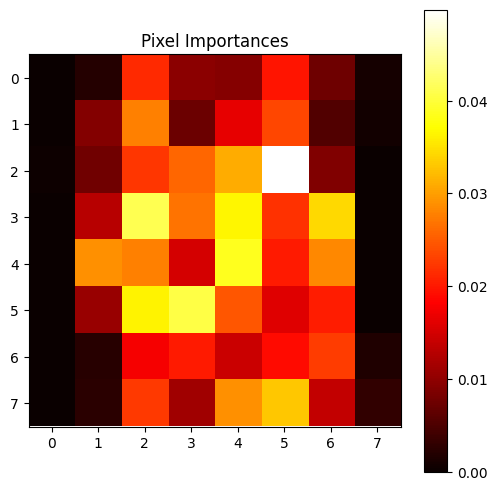

In [36]:
importances = model.feature_importances_
plt.figure(figsize=(6,6))
plt.imshow(importances.reshape(8,8), cmap='hot')  # digits data is 8x8
plt.colorbar()
plt.title("Pixel Importances")
plt.show()

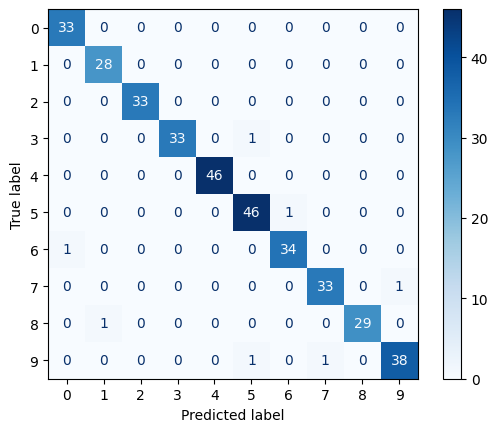

In [43]:
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test,y_predicted)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap = 'Blues')